In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import models

Importing libraries needed

In [3]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


-------------------------------------------------------------------------------------------------------------
<h1>Loading the Data</h1>
 


<h2>Reading CSV Files</h2>

In [4]:
# Read CSV files
test_images = pd.read_csv('csvTestImages 3360x1024.csv', header=None)
test_label= pd.read_csv('csvTestLabel 3360x1.csv', header=None)-1

train_images =  pd.read_csv('csvTrainImages 13440x1024.csv', header=None)
train_label = pd.read_csv('csvTrainLabel 13440x1.csv', header=None)-1



Subtracting 1 from the label values read from the CSV files, to  adjust the labels to start from 0 instead of 1.
for instance, character "أ" has label 0, "ب" has label 1, and so on...

--------------------------------------------------------------------------
<h1>Analyzing the Data</h1>


In [5]:
# Display basic information about the datasets
print("Training set shape:", train_images.shape)
print("Testing set shape:", test_images.shape)

Training set shape: (13440, 1024)
Testing set shape: (3360, 1024)


The code is simply printing out the shape of the training and testing data.

• The first tuple shows that the training data has a shape of (13440, 1024) which means there are 13440 images in the training set, each with a size of 1024 (32x32) pixels.

• The second tuple shows that the testing data has a shape of (3360, 1024) which means there are 3360 images in the testing set, each with a size of 1024 (32x32) pixels.

In [6]:
# Find the unique numbers from the train labels
classes = np.unique(train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  28
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


------------------------------------------------------------------------------------------------
<h1>Data Preprocessing</h1>

In [7]:
image_size = (32, 32)

train_images = train_images.values.reshape(-1, *image_size,1)
test_images= test_images.values.reshape(-1, *image_size,1)

train_images.shape, test_images.shape

((13440, 32, 32, 1), (3360, 32, 32, 1))

The train_images and test_images arrays are being reshaped to have four dimensions: the first dimension represents the number of samples, the second and third dimensions represent the height and width of each image (32x32 pixels), and the fourth dimension represents the number of color channels (1 for grayscale images).

The -1 argument in the reshape() function is used to automatically calculate the size of the first dimension based on the size of the other dimensions.

In [8]:
train_images = train_images.astype('float32')
test_images  = test_images.astype('float32')

This code is converting the data type of train_images_array and testing_images_array to float32 using the astype() method.

In [9]:
# Change the labels from categorical to one-hot encoding
train_label_one_hot = to_categorical(train_label)
test_label_one_hot = to_categorical(test_label)

# Display the change for category label using one-hot encoding
print('Original label:', train_label.iloc[0].values[0])
print('After conversion to one-hot:', train_label_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


print('After conversion to one-hot:', train_label_one_hot[0]) shows the result of converting the label into a one-hot encoded vector.
The vector has 28 elements from 0 to 27, with all elements set to 0 except for the 1st element, which is set to 1.

This is because the label corresponds to the 1st class (أ), and in a one-hot encoded vector, only the element corresponding to the class is set to 1, while all other elements are set to 0.

In [10]:
print('After conversion to one-hot:', train_label_one_hot[9])

After conversion to one-hot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


<h1>Data Visulaization</h1>

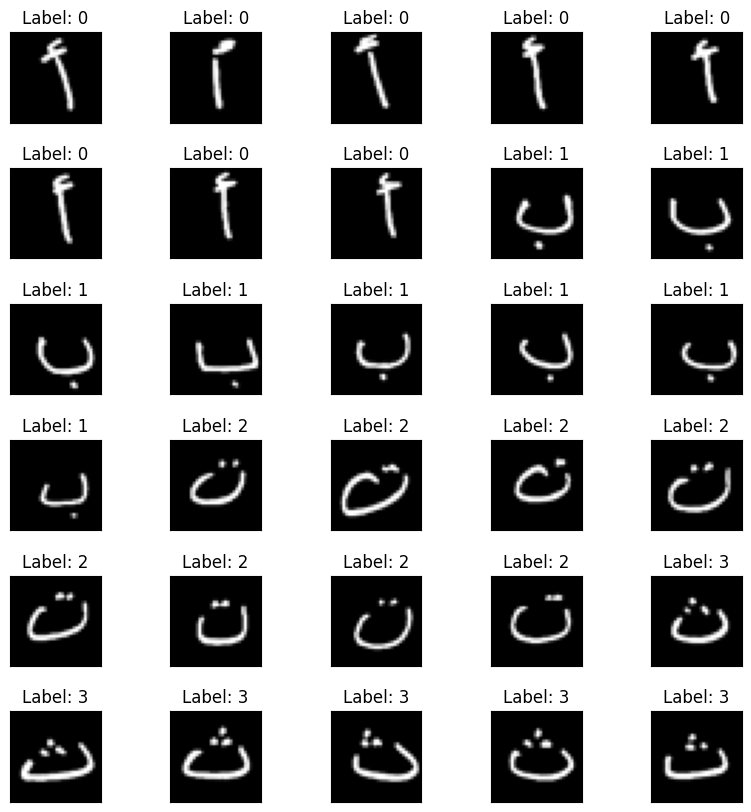

In [11]:
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[[i]].reshape(32, 32).T, "gray")
    plt.title(f"Label: {train_label.iloc[i, 0]}")
    plt.subplots_adjust(hspace=0.5)
plt.show()

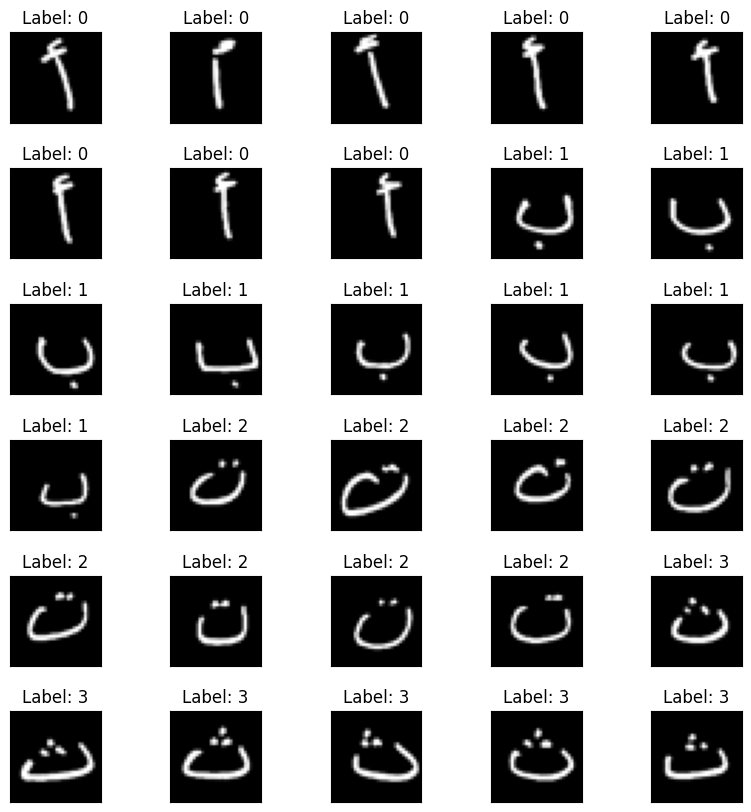

In [12]:
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[[i]].reshape(32, 32).T, "gray")
    plt.title(f"Label: {train_label.iloc[i, 0]}")
    plt.subplots_adjust(hspace=0.5)
plt.show()

---------------------------------------------------------------------------------------------------------
<h1>The Network</h1>


The images are of size 32 x 32. We convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 32 x 32 x 1, and feed this as an input to the network.

<h1>Model the Data</h1>


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ReLU
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [14]:
epochs = 50
batch_size = 120

--------------------------------------------------------------------
<h1>CNN Architecture</h1>

In [15]:
# Define the CNN model
model = Sequential()

# Convolutional Layer 1 with 32 filters, kernel size (3,3), padding 'same', and activation 'relu'
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

# MaxPooling Layer 1 with pool size (2,2)
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2 with 64 filters, kernel size (3,3), padding 'same', and activation 'relu'
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# MaxPooling Layer 2 with pool size (2,2)
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3 with 64 filters, kernel size (3,3), padding 'same', and activation 'relu'
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# MaxPooling Layer 3 with pool size (2,2)
model.add(MaxPooling2D((2, 2)))

# Dropout Layer 1 with dropout rate 0.5
model.add(Dropout(0.5))

# Convolutional Layer 4 with 64 filters, kernel size (3,3), padding 'same', and activation 'relu'
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# MaxPooling Layer 4 with pool size (2,2)
model.add(MaxPooling2D((2, 2)))

# Dropout Layer 2 with dropout rate 0.5
model.add(Dropout(0.5))

# Flatten the output before the fully connected layers
model.add(Flatten())

# Fully Connected Layer 1 with 256 neurons and activation 'relu'
model.add(Dense(256, activation='relu'))

# Fully Connected Layer 2 with 256 neurons and activation 'relu'
model.add(Dense(256, activation='relu'))

# Dropout Layer 3 with dropout rate 0.5
model.add(Dropout(0.5))

# Output layer for Arabic characters with 28 classes and activation 'softmax'
model.add(Dense(28, activation='softmax'))

<h1>Compiling the Model</h1>

In [16]:
# Compile the model with Adam optimizer and learning rate 0.001
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

We have selected an initial architecture based on the work of Alsayed, Alhag, Li, Chunlin, Ahamed, Hazim, Mohammed, and Obied, Zainab in their paper titled "Arabic Handwritten Character Recognition Using Convolutional Neural Networks," published in 2023 (DOI: 10.21203/rs.3.rs-3141935/v1).

The model, denoted as CNN-14 (Convolutional Neural Network-14 Layers), comprises 8 convolutional layers, 4 max-pooling layers, and 2 flatten layers. The input images are formatted to have dimensions of (32, 32, 1), indicating a width and height of 32 pixels and grayscale representation. The model architecture includes two hidden layers. The first hidden layer consists of 32 filters, followed by the second layer with 64 filters, both utilizing a kernel size of (3, 3) and applying padding ('same') to cover the entire image size. The activation function 'relu' is applied to all hidden layers. The output layer is divided into two parts: 28 classes for the AHCD dataset. The softmax function is employed for each class to determine the probability of an input representing a specific Arabic letter. The Adam optimizer is utilized in the model with a learning rate set to 0.001.1.

------------------------------------------------------------------------------------------------------
<h1>Training and Evaluating the Model with early stopping</h1>

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_history = model.fit(train_images, 
                          train_label_one_hot,
                          epochs=epochs,
                          batch_size=batch_size, 
                          verbose=1,
                          validation_data=(test_images, test_label_one_hot),
                          callbacks=[early_stopping])

Epoch 1/50


112/112 [==============================] - 29s 235ms/step - loss: 3.3657 - accuracy: 0.0388 - val_loss: 3.2753 - val_accuracy: 0.0440
Epoch 2/50
112/112 [==============================] - 28s 248ms/step - loss: 2.7893 - accuracy: 0.1353 - val_loss: 1.6511 - val_accuracy: 0.3815
Epoch 3/50
112/112 [==============================] - 32s 285ms/step - loss: 1.5720 - accuracy: 0.4180 - val_loss: 0.8273 - val_accuracy: 0.6985
Epoch 4/50
112/112 [==============================] - 29s 254ms/step - loss: 0.9589 - accuracy: 0.6399 - val_loss: 0.4979 - val_accuracy: 0.8289
Epoch 5/50
112/112 [==============================] - 24s 211ms/step - loss: 0.7060 - accuracy: 0.7466 - val_loss: 0.3778 - val_accuracy: 0.8720
Epoch 6/50
112/112 [==============================] - 24s 217ms/step - loss: 0.5011 - accuracy: 0.8314 - val_loss: 0.2802 - val_accuracy: 0.9071
Epoch 7/50
112/112 [==============================] - 24s 218ms/step - loss: 0.4108 - accuracy: 0.8681 - val_loss: 0.2536 - val_

We use the EarlyStopping callback from Keras, which is a regularization technique to prevent overfitting during training. The EarlyStopping callback monitors the testing loss (val_loss) during training. If the testing does not improve for a certain number of consecutive epochs specified by the patience parameter (in our case, 5 epochs), training is stopped early. The restore_best_weights parameter ensures that the model weights are restored to the ones that achieved the best performance on the testing set.

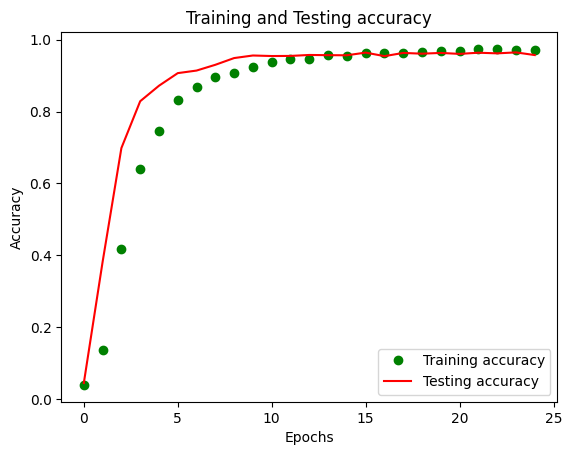

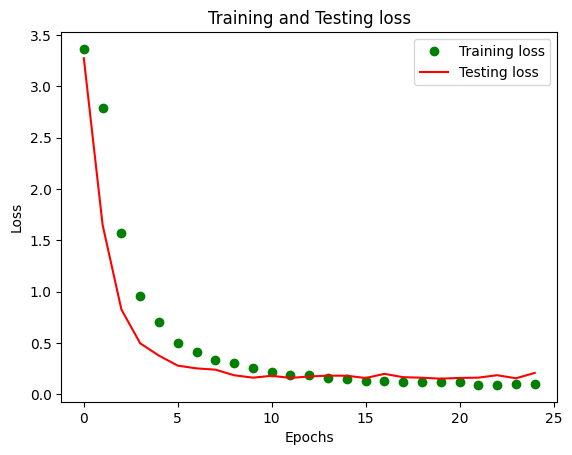

In [19]:
training_acc = model_history.history['accuracy']
testing_accuracy = model_history.history['val_accuracy']
training_loss = model_history.history['loss']
testing_loss = model_history.history['val_loss']
epochs = range(len(testing_accuracy))

# Plotting accuracy
plt.plot(epochs, training_acc, 'go', label='Training accuracy')  # Change color to green
plt.plot(epochs, testing_accuracy, 'r', label='Testing accuracy')   # Change color to red
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.figure()
plt.plot(epochs, training_loss, 'go', label='Training loss')  
plt.plot(epochs, testing_loss, 'r', label='Testing loss')       
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We can see that the testing loss and testing accuracy both are in sync with the training loss and training accuracy. Even though the testing loss and accuracy line is not linear, but it shows that your model is not overfitting: the testing loss is decreasing and not increasing, and there is not much gap between training and testing accuracy.

<h1>Predict Label</h1>

<h2>Predicting Correct Labels</h2>

In [20]:
test_label_1d = test_label.squeeze()

105/105 [==============================] - 3s 25ms/step
Found 3231 correct labels


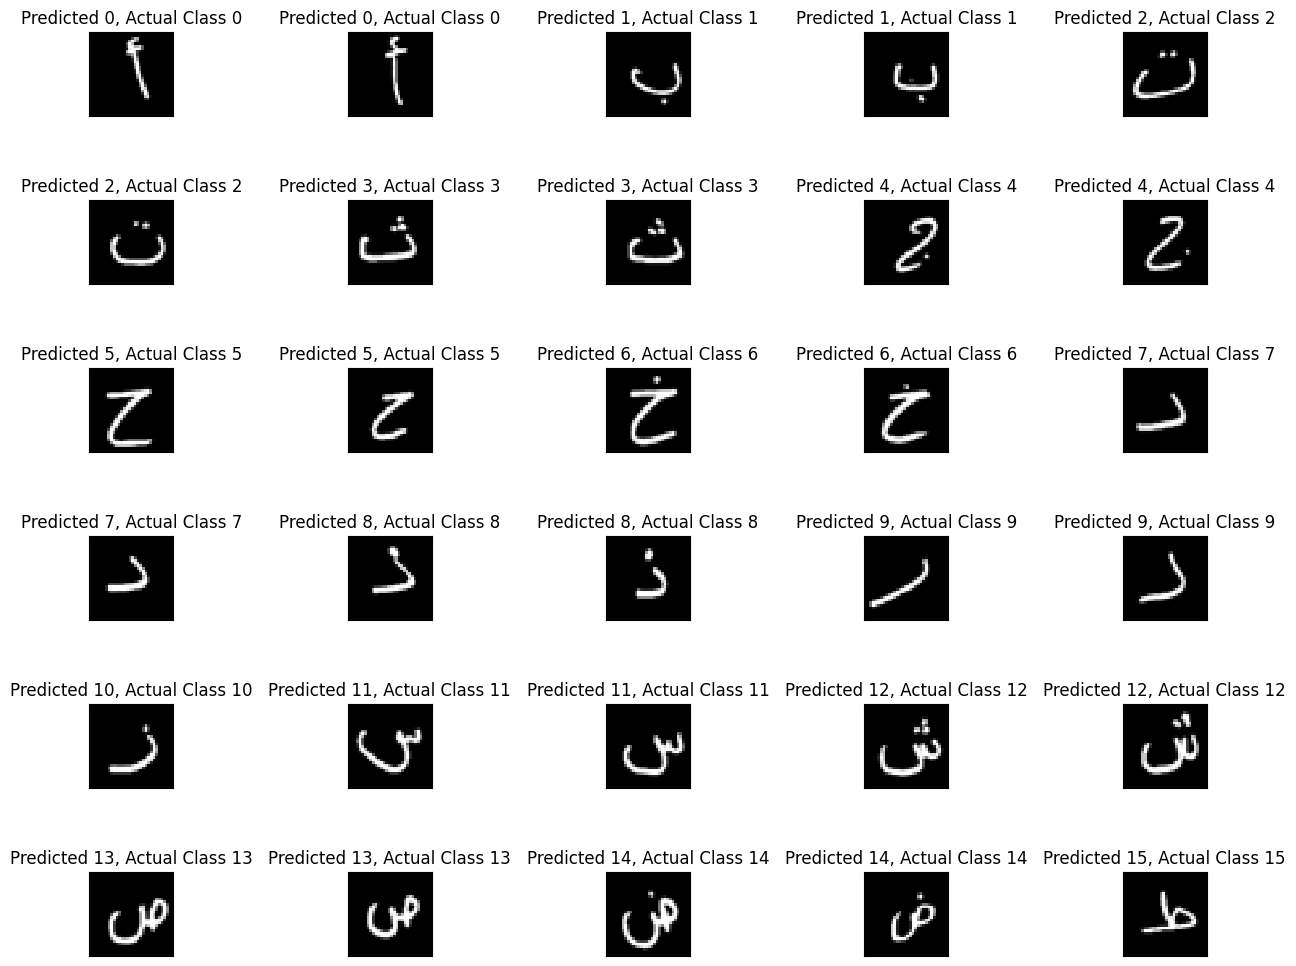

In [21]:
predicted_classes= model.predict(test_images)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

correct = np.where(predicted_classes == test_label_1d)[0]
print("Found %d correct labels" % len(correct))

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=1, wspace=1)

for i, idx in enumerate(correct[:30]):
    plt.subplot(6,5, i + 1)

    plt.imshow(test_images[idx].reshape(32, 32).T, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual Class {}".format(predicted_classes[idx], test_label_1d[idx]))
    plt.xticks([]) 
    plt.yticks([]) 

plt.show()


<h2>Predicting incorrect labels</h2>

Found 129 incorrect labels


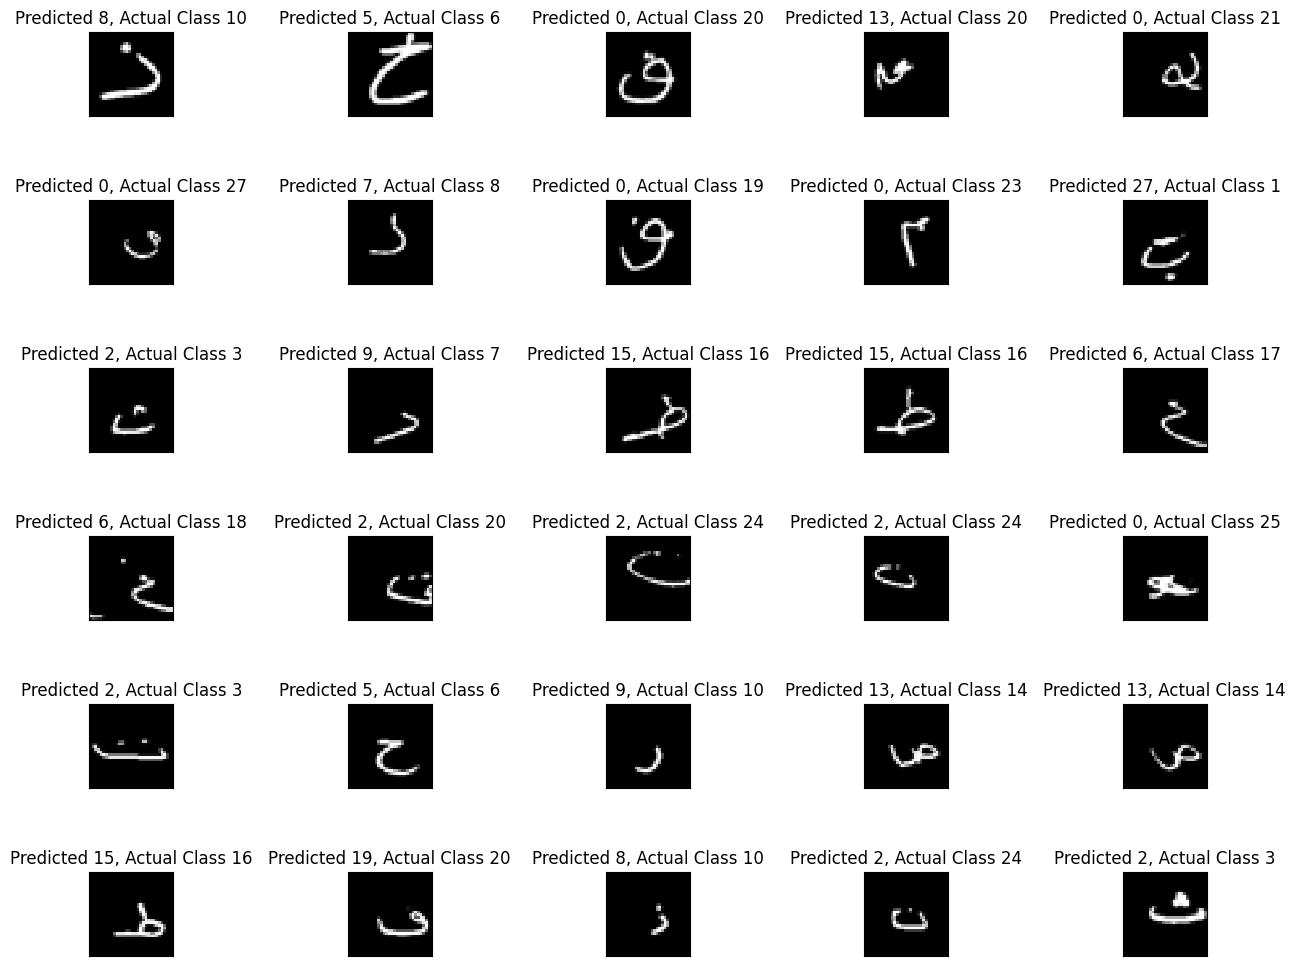

In [22]:
incorrect = np.where(predicted_classes != test_label_1d)[0]
print("Found %d incorrect labels" % len(incorrect))

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=1, wspace=1)

for i, idx in enumerate(incorrect[:30]):
    plt.subplot(6,5, i + 1) 

    plt.imshow(test_images[idx].reshape(32, 32).T, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual Class {}".format(predicted_classes [idx], test_label_1d[idx]))
    plt.xticks([]) 
    plt.yticks([]) 

plt.show()

The accuracy in correctly classifying values is 3231, with only 129 instances of incorrect classifications, showcasing a commendable performance. However, there is a hint of potential overfitting. To mitigate this concern, implementing image augmentation, as done in Task 2, could be an effective strategy.